# Big Boss India  - visualize Bigg Boss India seasons data

Kaggle Dataset - https://www.kaggle.com/thirumani/bigg-boss-india-hindi-telugu-tamil-kannada

Bigg Boss India - data set of all Indian versions and seasons
Bigg Boss Hindi Season 1/2/3/4/5/6/7/8/9/10/11/12/13
Bigg Boss Kannada Season 1/2/3/4/5/6/7
Bigg Boss Telugu Season 1/2/3/4
Bigg Boss Tamil Season 1/2/3/4
Bigg Boss Bangla Season 1/2
Bigg Boss Marathi Season 1/2
Bigg Boss Malayalam Season 1/2

Here is the data dictionary for Big Boss (India) season's datasets.
1. Language - Language in which the show was telecasted/designed
2. Season Number - Season number
3. Name - Name of participant. Original Entrants are sorted in alphabetically
4. Profession - Profession of house mate
5. Gender - Gender of the BiggBoss contestant, such as Male, Female, LGBT
6. Entry Date - Date of entry into house
7. Elimination Date - Date of elimination/Eviction
8. Elimination Week Number - (Final) Eviction week number
9. Wild Card - Entered through wild card or not
10. Season Length - Number of days of season
11. Number of Housemates - Total number of house mates, in entire season, including wildcard entries
12. Season Start Date - Season start date
13. Season End Date - Season last day or Finale day
14. Host Name - Name of the host (who hosted most of the weekend episodes)
15. Prize Money (INR) - Total prize money in INR
16. Broadcasted By - Channel name who has broadcasted the season (in India)
17. Average TRP - Average TV TRP of the season
18. Number of Evictions Faced - Number of Evictions Faced by the Bigg Boss house mate
19. Number of re-entries - Number of reentries into the house, in the same season (not fake evictions & secret room)
20. Number of times elected as Captain - Number of times/weeks elected as Captain
21. Winner - Winner or not (1 - winner, 0 - otherwise)

In [176]:
# Import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid")

In [177]:
# load data
data = pd.read_csv('Bigg_Boss_India.csv',encoding='latin1')

In [178]:
print(data.isna().sum())
data.describe(include="all")

Language                                0
Season Number                           0
Name                                    0
Profession                              0
Gender                                  0
Entry Date                             82
Elimination Date                      483
Elimination Week Number               112
Wild Card                               0
Season Length                           0
Number of Housemates                    0
Season Start Date                       0
Season End Date                        16
Host Name                               0
Prize Money (INR)                      26
Broadcasted By                          0
Average TRP                           213
Number of Evictions Faced              64
Number of re-entries                   64
Number of times elected as Captain     80
Winner                                 26
dtype: int64


,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,...,Season Start Date,Season End Date,Host Name,Prize Money (INR),Broadcasted By,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Winner
count,588,588.000000,588,588,588,506,105,476.000000,588,588.000000,...,588,572,588,562,588,375.000000,524.000000,524.000000,508.000000,562.000000
unique,7,NaN,586,74,3,39,56,NaN,2,NaN,...,33,30,15,4,11,NaN,NaN,NaN,NaN,NaN
top,Hindi,NaN,Vikas Gupta,Actress,Female,21-Oct-18,30-Sep-18,NaN,No,NaN,...,05-Jan-20,30-Sep-18,Salman Khan,0,Colors,NaN,NaN,NaN,NaN,NaN
freq,236,NaN,2,136,308,18,7,NaN,496,NaN,...,23,53,154,531,221,NaN,NaN,NaN,NaN,NaN
mean,NaN,4.605442,NaN,NaN,NaN,NaN,NaN,9.115546,NaN,102.013605,...,NaN,NaN,NaN,NaN,NaN,5.780187,3.948473,0.095420,0.545276,0.055160
std,NaN,3.544428,NaN,NaN,NaN,NaN,NaN,4.734341,NaN,11.020184,...,NaN,NaN,NaN,NaN,NaN,2.687312,2.772305,0.306803,0.766609,0.228496
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,70.000000,...,NaN,NaN,NaN,NaN,NaN,2.720000,0.000000,0.000000,0.000000,0.000000
25%,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,98.000000,...,NaN,NaN,NaN,NaN,NaN,3.540000,2.000000,0.000000,0.000000,0.000000
50%,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,9.000000,NaN,105.000000,...,NaN,NaN,NaN,NaN,NaN,4.700000,3.000000,0.000000,0.000000,0.000000
75%,NaN,7.000000,NaN,NaN,NaN,NaN,NaN,14.000000,NaN,105.000000,...,NaN,NaN,NaN,NaN,NaN,8.200000,6.000000,0.000000,1.000000,0.000000


In [179]:
data.dtypes

Language                               object
Season Number                           int64
Name                                   object
Profession                             object
Gender                                 object
Entry Date                             object
Elimination Date                       object
Elimination Week Number               float64
Wild Card                              object
Season Length                           int64
Number of Housemates                    int64
Season Start Date                      object
Season End Date                        object
Host Name                              object
Prize Money (INR)                      object
Broadcasted By                         object
Average TRP                           float64
Number of Evictions Faced             float64
Number of re-entries                  float64
Number of times elected as Captain    float64
Winner                                float64
dtype: object

In [180]:
data = data.rename(columns={"Language":"Lang","Season Number":"s_no","Name":"name","Profession":"profession","Gender":"sex","Entry Date":"enter_date","Elimination Date":"exit_date","Elimination Week Number":"exit_wn","Wild Card":"wild_card","Season Length":"s_length","Number of Housemates":"no_hmate","Season Start Date":"start_date","Season End Date":"end_date","Host Name":"host_name","Prize Money (INR)":"amount","Broadcasted By":"broadcast","Average TRP":"Avg_trp","Number of Evictions Faced":"evi_faced","Number of re-entries":"re_entries","Number of times elected as Captain":"no_captain","Winner":"winner"})

In [181]:
# Coverting String Object to Date
data_columns = np.array(["enter_date","exit_date","start_date","end_date"])
data[data_columns] = data[data_columns].apply(pd.to_datetime)
data["start_year"] = pd.DatetimeIndex(data["start_date"]).year

In [182]:

data.columns

Index(['Lang', 's_no', 'name', 'profession', 'sex', 'enter_date', 'exit_date',
       'exit_wn', 'wild_card', 's_length', 'no_hmate', 'start_date',
       'end_date', 'host_name', 'amount', 'broadcast', 'Avg_trp', 'evi_faced',
       're_entries', 'no_captain', 'winner', 'start_year'],
      dtype='object')

#### Analysing the Winner data
1. How is the Age, Sex, profession connected to Winning factor ?

In [183]:
winner_data = data[data['winner'] == 1]

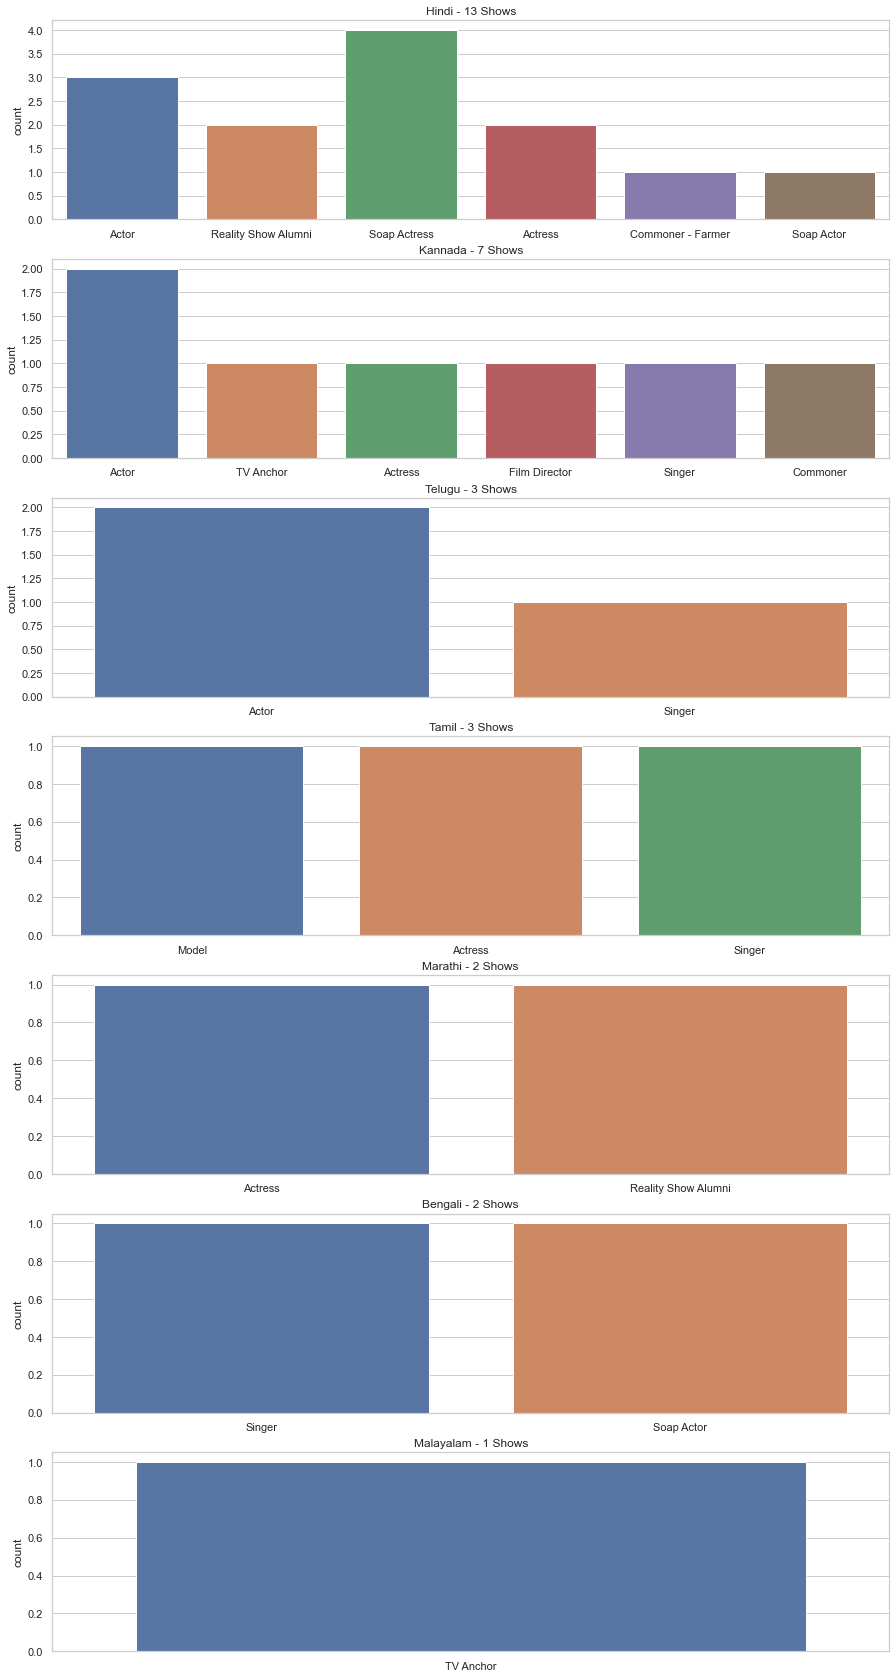

In [184]:
lang = winner_data["Lang"].unique()
fig,ax = plt.subplots(nrows=lang.size,figsize=(15,30))

for index in range(0,lang.size):
    sns.countplot(data=winner_data[winner_data["Lang"] == lang[index]], x="profession", ax=ax[index])
    ax[index].set(title="{} - {} Shows".format(lang[index],winner_data[winner_data["Lang"] == lang[index]]["Lang"].count()))
    ax[index].set_xlabel("")
    #plt.setp(ax[index].xaxis.get_majorticklabels(), rotation=45)
plt.show()

#### Assumption - Is the gender influence the winning per ? 

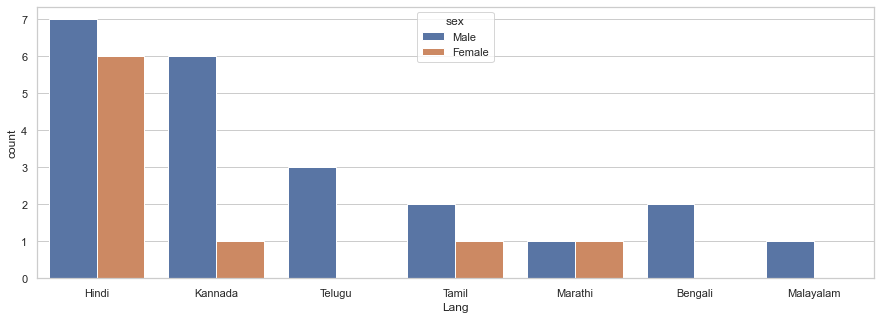

In [185]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data=winner_data, x="Lang",hue="sex")
plt.show()


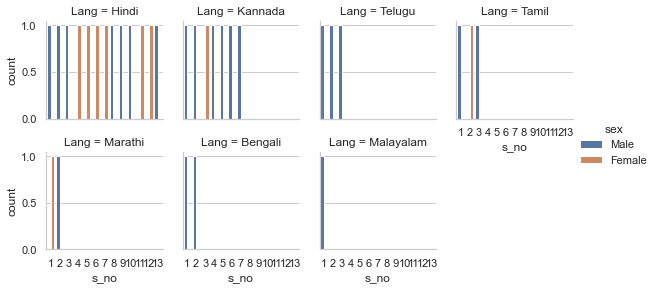

In [186]:
# Any pattern in winning trend.

#plt.figure(figsize=(15,5))
sns.catplot(data=winner_data, x="s_no",hue="sex",col="Lang",kind="count",col_wrap=4,height=2,aspect=1)
#plt.show()

Observation - 
1. Kannada and Telugu - Male has won highest times.
2. In Hindi - it was almost equal.

In [187]:
winner_data[winner_data['Lang'] == 'Hindi'][["s_no","profession","Avg_trp","start_year"]]

,s_no,profession,Avg_trp,start_year
8,1,Actor,2.72,2006
16,2,Reality Show Alumni,2.89,2008
42,3,Actor,2.83,2009
57,4,Soap Actress,4.95,2010
62,5,Soap Actress,4.19,2011
92,6,Soap Actress,3.81,2012
102,7,Actress,4.40,2013
121,8,Actor,3.77,2014
144,9,Reality Show Alumni,2.90,2015
165,10,Commoner - Farmer,3.54,2016


Commoner in Big Boss has not created major impact 

#### TRP of the season 

In [188]:
data.columns

Index(['Lang', 's_no', 'name', 'profession', 'sex', 'enter_date', 'exit_date',
       'exit_wn', 'wild_card', 's_length', 'no_hmate', 'start_date',
       'end_date', 'host_name', 'amount', 'broadcast', 'Avg_trp', 'evi_faced',
       're_entries', 'no_captain', 'winner', 'start_year'],
      dtype='object')

In [191]:
data_trp = data[["Lang","s_no","Avg_trp","start_year","broadcast","amount"]].dropna()

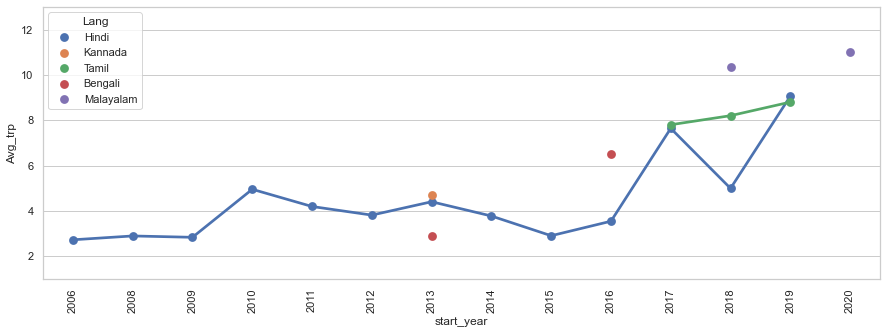

In [192]:
plt.figure(figsize=(15,5))
ax = sns.pointplot(data=data_trp,x="start_year",y="Avg_trp",hue="Lang",kind="point")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.ylim(1,13)
plt.show()

Observation
- Data Available for Hindi and Tamil
- there is up trend
- Two import external events ( release of hotstart - 02/2015 ; Release of Jio - Beta ( 12/2015) Launch ( 09/2016 )

In [196]:
data[["Avg_trp","amount"]]


,Avg_trp,amount
0,2.72,0
1,2.72,0
2,2.72,0
3,2.72,0
4,2.72,0
...,...,...
583,11.03,0
584,11.03,0
585,11.03,0
586,11.03,NaN
